Вы получили основные навыки обработки данных, теперь пора испытать их на практике. Сейчас вам предстоит заняться задачей классификации.

Представлен датасет центра приюта животных, и вашей задачей будет обучить модель таким образом, чтобы  по определенным признакам была возможность максимально уверенно предсказать метки 'Adoption' и 'Transfer' (столбец “outcome_type”).

Здесь вы вольны делать что угодно. Я хочу видеть от вас:
1. Проверка наличия/обработка пропусков
2. Проверьте взаимосвязи между признаками
3. Попробуйте создать свои признаки
4. Удалите лишние
5. Обратите внимание на текстовые столбцы. Подумайте, что можно извлечь полезного оттуда
6. Использование профайлера вам поможет.
7. Не забывайте, что у вас есть PCA (Метод главных компонент). Он может пригодиться.

Вспомните о всем, что я говорил на предыдущих занятиях. Не все будет пригодится, но в жизни вам никто не будет говорить, что использовать :)

Хорошим классификатором для этой задачи будет "Случайный лес" (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Понимать суть работы "леса" не обязательно на данном этапе, но качество предсказаний будет выше, чем с линейным классификатором. (если желаете, вот гайд https://adataanalyst.com/scikit-learn/linear-classification-method/)

Желаю успеха :)

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re
from sklearn.ensemble import RandomForestClassifier

In [26]:
df =  pd.read_csv('aac_shelter_outcomes.csv')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  78248 non-null  object
 1   animal_id         78256 non-null  object
 2   animal_type       78256 non-null  object
 3   breed             78256 non-null  object
 4   color             78256 non-null  object
 5   date_of_birth     78256 non-null  object
 6   datetime          78256 non-null  object
 7   monthyear         78256 non-null  object
 8   name              54370 non-null  object
 9   outcome_subtype   35963 non-null  object
 10  outcome_type      78244 non-null  object
 11  sex_upon_outcome  78254 non-null  object
dtypes: object(12)
memory usage: 3.6+ MB


In [28]:
df.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A706536,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,2016-04-18T00:00:00,2016-04-18T00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784


In [29]:
df.isnull().sum()

age_upon_outcome        8
animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
monthyear               0
name                23886
outcome_subtype     42293
outcome_type           12
sex_upon_outcome        2
dtype: int64

In [30]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,2014-07-22T16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,2014-06-03T14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,2014-07-07T14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [31]:
def string_to_time(row):
    try:
        return dt.strptime(row, '%Y-%m-%dT%H:%M:%S' )
    except:
        return row   

In [32]:
# переводим все в datetime
df['date_of_birth'] = df['date_of_birth'].apply(string_to_time) 
df['datetime'] = df['datetime'].apply(string_to_time)
df['monthyear'] = df['monthyear'].apply(string_to_time)

In [33]:
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [34]:
(df['datetime'] - df['monthyear']).sum()

Timedelta('0 days 00:00:00')

In [35]:
#так как данные одинаковые, то дропаем их
df.drop('monthyear', axis=1, inplace=True)

In [36]:
df.loc[df['age_upon_outcome'].isna(), :]

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
68246,NaN,A737705,Dog,Labrador Retriever Mix,Black/White,2013-11-02,2016-11-19 16:35:00,*Heddy,NaN,NaN,NaN
76825,NaN,A764319,Dog,Pit Bull Mix,Black/White,2016-12-27,2017-12-30 16:47:00,*Emma,NaN,NaN,Intact Female
77976,NaN,A765547,Bird,Leghorn Mix,White/Red,2017-01-22,2018-01-25 13:23:00,NaN,Partner,Transfer,Intact Female
78081,NaN,A765899,Dog,Miniature Poodle Mix,Black,2011-01-29,2018-01-29 15:49:00,NaN,Suffering,Euthanasia,Neutered Male
78114,NaN,A765914,Cat,Domestic Shorthair Mix,Lynx Point,2017-01-29,2018-01-29 18:08:00,NaN,Suffering,Euthanasia,Intact Male
78162,NaN,A765901,Dog,Maltese Mix,Buff,2017-01-29,2018-01-31 08:14:00,NaN,Partner,Transfer,Intact Male
78208,NaN,A765960,Dog,Beagle/Catahoula,Tan/White,2010-02-01,2018-02-01 09:21:00,NaN,Suffering,Euthanasia,Intact Male
78253,NaN,A766098,Other,Bat Mix,Brown,2017-02-01,2018-02-01 18:08:00,NaN,Rabies Risk,Euthanasia,Unknown


In [37]:
df[df.index.duplicated(keep=False)]['age_upon_outcome'].isna().all()

True

In [38]:
#age_upon_outcome - это возраст на момент выхода из приюта. 
#Можно эти значения заменить разницей выхода из приюта (datetime) и днём рождения (date_of_birth)
(df.loc[df['age_upon_outcome'].isna(), 'datetime'] - 
 df.loc[df['age_upon_outcome'].isna(), 'date_of_birth']).dt.round('d').astype(str).head(10)

68246    1114 days
76825     369 days
77976     369 days
78081    2558 days
78114     366 days
78162     367 days
78208    2922 days
78253     366 days
dtype: object

In [39]:
df.loc[df['age_upon_outcome'].isna(), 'age_upon_outcome'] = \
(df.loc[df['age_upon_outcome'].isna(), 'datetime'] - df.loc[df['age_upon_outcome'].isna(), 'date_of_birth']) \
.dt.round('d').astype(str)

In [40]:
df.loc[df['age_upon_outcome'].isna(), :]

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome


In [41]:
extract = r'([0-9]+)\s([A-Za-z]+)'
df_days = df['age_upon_outcome'].str.extract(extract)
df_days.columns = ['number', 'days'] # колонка days пока не всегда будет соответствовать своему названию

In [42]:
df = pd.merge(df, df_days, left_index=True, right_index=True)
df.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,number,days
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,2,weeks
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,1,year
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,1,year
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,9,years
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,5,months


In [43]:
def date_to_days(row):
    try:
        if 'year' in row:
            return 365
        elif 'month' in row:
            return 30
        elif 'week' in row:
            return 7
        elif 'day' in row:
            return 1
    except:
        print(row)

In [44]:
df['days'] = df['days'].apply(date_to_days)

In [45]:
df['number'] = df['number'].astype(int)
df['days'] = df['days'].astype(int)
df['days'] = df['days'] * df['number']

In [46]:
df.drop(['age_upon_outcome', 'number'], axis=1, inplace=True)

In [47]:
df.head()

,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,days
0,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male,14
1,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female,365
2,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male,365
3,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male,3285
4,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown,150


Теперь есть таблица, соклько дней в приюте животное живет

In [48]:
df.animal_type.value_counts()

Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

In [53]:
df.breed.value_counts()

Domestic Shorthair Mix              23335
Pit Bull Mix                         6135
Chihuahua Shorthair Mix              4733
Labrador Retriever Mix               4608
Domestic Medium Hair Mix             2323
                                    ...  
Black/Tan Hound/Great Dane              1
Cairn Terrier/Scottish Terrier          1
Cardigan Welsh Corgi/Rat Terrier        1
Staffordshire/Border Collie             1
Lhasa Apso/Pbgv                         1
Name: breed, Length: 2128, dtype: int64

In [52]:
df.color.value_counts()

Black/White                8153
Black                      6602
Brown Tabby                4445
Brown                      3486
White                      2784
                           ... 
Tortie Point/Lynx Point       1
Calico/Calico                 1
Liver/Cream                   1
Tricolor/Calico               1
Torbie/Brown                  1
Name: color, Length: 525, dtype: int64

In [51]:
df.outcome_subtype.value_counts()

Partner                19660
Foster                  5558
SCRP                    3211
Suffering               2514
Rabies Risk             2417
Snr                      626
Aggressive               506
Offsite                  367
In Kennel                343
Medical                  259
In Foster                182
Behavior                 142
At Vet                    59
Enroute                   45
Underage                  28
Court/Investigation       18
In Surgery                16
Possible Theft             9
Barn                       3
Name: outcome_subtype, dtype: int64

In [54]:
df.outcome_type.value_counts()

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
Name: outcome_type, dtype: int64

In [55]:
df.sex_upon_outcome.value_counts()

Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
Name: sex_upon_outcome, dtype: int64

Для всех колонок выше сделаем onehotencoder

In [56]:
df['outcome_type'].unique()

array(['Transfer', 'Adoption', 'Euthanasia', 'Return to Owner', 'Died',
       'Disposal', 'Relocate', 'Missing', nan, 'Rto-Adopt'], dtype=object)

In [57]:
(df
    .groupby(['outcome_type', 'outcome_subtype'])
    .agg({'outcome_type': ['count']})
)

outcome_type
                                        count
outcome_type outcome_subtype                 
Adoption     Barn                           1
             Foster                      5558
             Offsite                      367
Died         At Vet                        33
             Enroute                       45
             In Foster                    164
             In Kennel                    335
             In Surgery                    16
Euthanasia   Aggressive                   506
             At Vet                        26
             Behavior                     142
             Court/Investigation           18
             Medical                      259
             Rabies Risk                 2417
             Suffering                   2514
             Underage                      28
Missing      In Foster                     18
             In Kennel                      8
             Possible Theft                 9
Transfer     Barn                           2
             Partner                    19660
             SCRP                        3211
             Snr                          626

In [58]:
df.dropna(subset=['outcome_type'], inplace=True)

In [59]:
df.isna().sum()

animal_id               0
animal_type             0
breed                   0
color                   0
date_of_birth           0
datetime                0
name                23881
outcome_subtype     42281
outcome_type            0
sex_upon_outcome        1
days                    0
dtype: int64

In [60]:
df.loc[df['sex_upon_outcome'].isna(), :]

,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome,days
16300,A667395,Dog,Dachshund,Brown Merle,2006-11-17,2013-11-27 16:11:00,Diego,NaN,Return to Owner,NaN,2555


In [63]:
df.loc[df['sex_upon_outcome'].isna(), 'sex_upon_outcome'] = 'Neutered Male'

In [64]:
df.drop(['name', 'outcome_subtype'], axis=1, inplace=True)

In [65]:
df.shape

(78244, 9)

In [66]:
df = pd.get_dummies(df, columns=['animal_type', 'outcome_type', 'sex_upon_outcome'], drop_first=True)

In [67]:
df.drop(['date_of_birth', 'datetime'], axis=1, inplace=True)

In [68]:
df.head()

,animal_id,breed,color,days,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,A684346,Domestic Shorthair Mix,Orange Tabby,14,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,A666430,Beagle Mix,White/Brown,365,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,A675708,Pit Bull,Blue/White,365,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,A680386,Miniature Schnauzer Mix,White,3285,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,A683115,Bat Mix,Brown,150,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
lables_breed = df.iloc[:, 1:2].values
lables_color = df.iloc[:, 2:3].values

In [71]:
lableEn = LabelEncoder()
lables_breed = lableEn.fit_transform(lables_breed)
lables_color = lableEn.fit_transform(lables_color)

c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [72]:
df['breed'] = lables_breed
df['color'] = lables_color

In [73]:
df.head()

,animal_id,breed,color,days,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,A684346,937,321,14,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,A666430,255,474,365,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,A675708,1613,119,365,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,A680386,1468,463,3285,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,A683115,253,122,150,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [74]:
df.breed.value_counts()

937     23332
1614     6133
658      4733
1261     4607
932      2323
        ...  
363         1
555         1
339         1
275         1
2047        1
Name: breed, Length: 2128, dtype: int64

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

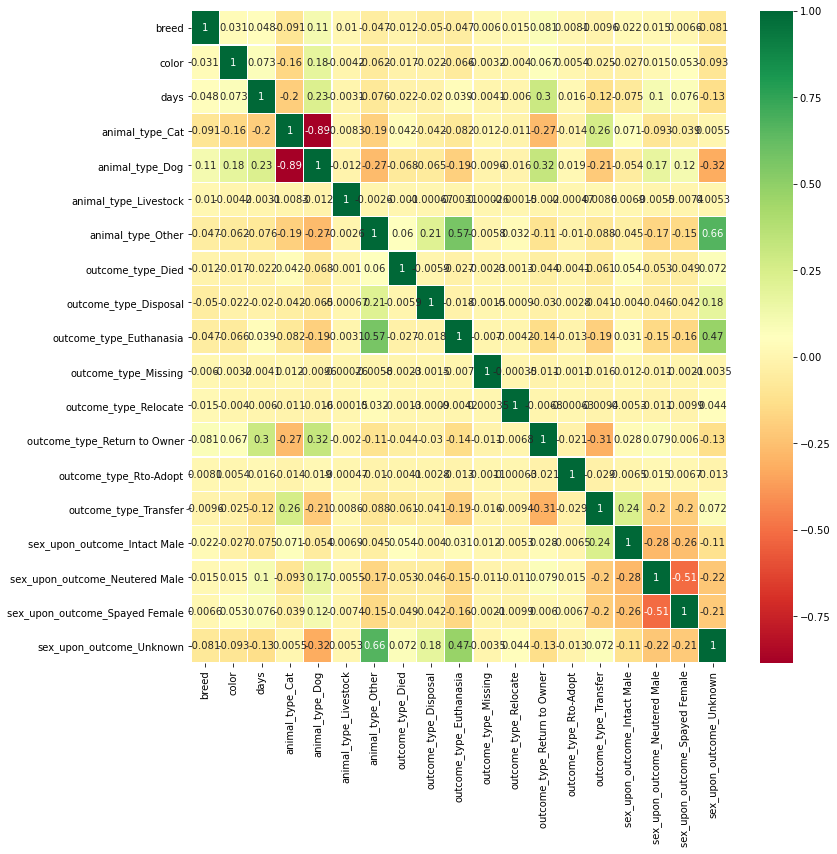

In [76]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Видно сильную корреляцию между animal_type = other и sex_upon_outcome_Unknown. 

In [77]:
df.count()

animal_id                         78244
breed                             78244
color                             78244
days                              78244
animal_type_Cat                   78244
animal_type_Dog                   78244
animal_type_Livestock             78244
animal_type_Other                 78244
outcome_type_Died                 78244
outcome_type_Disposal             78244
outcome_type_Euthanasia           78244
outcome_type_Missing              78244
outcome_type_Relocate             78244
outcome_type_Return to Owner      78244
outcome_type_Rto-Adopt            78244
outcome_type_Transfer             78244
sex_upon_outcome_Intact Male      78244
sex_upon_outcome_Neutered Male    78244
sex_upon_outcome_Spayed Female    78244
sex_upon_outcome_Unknown          78244
dtype: int64

In [80]:
#удалим дубли
df.drop_duplicates(inplace=True)
df.count()

animal_id                         75425
breed                             75425
color                             75425
days                              75425
animal_type_Cat                   75425
animal_type_Dog                   75425
animal_type_Livestock             75425
animal_type_Other                 75425
outcome_type_Died                 75425
outcome_type_Disposal             75425
outcome_type_Euthanasia           75425
outcome_type_Missing              75425
outcome_type_Relocate             75425
outcome_type_Return to Owner      75425
outcome_type_Rto-Adopt            75425
outcome_type_Transfer             75425
sex_upon_outcome_Intact Male      75425
sex_upon_outcome_Neutered Male    75425
sex_upon_outcome_Spayed Female    75425
sex_upon_outcome_Unknown          75425
dtype: int64

In [81]:
df[df['animal_id'].duplicated(keep=False)].sort_values(by='animal_id').head(10)

,animal_id,breed,color,days,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
7055,A006100,1959,523,2555,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
73490,A006100,1959,523,3650,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6968,A006100,1959,523,2190,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
11161,A245945,1261,402,5110,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
36480,A245945,1261,402,5475,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
31362,A282897,937,22,4745,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
12527,A282897,937,22,4380,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
17269,A287017,658,58,4745,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
36172,A287017,658,58,5110,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
27129,A304036,937,155,4745,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [82]:
df.set_index('animal_id', inplace=True)
df.index.name = None
df.head()

,breed,color,days,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
A684346,937,321,14,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
A666430,255,474,365,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
A675708,1613,119,365,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
A680386,1468,463,3285,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
A683115,253,122,150,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [83]:
from sklearn.preprocessing import MinMaxScaler

In [84]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
np_scaled = min_max_scaler.fit_transform(df)
df_norm = pd.DataFrame(np_scaled)
df_norm.columns = df.columns
df_norm.head()

,breed,color,days,animal_type_Cat,animal_type_Dog,animal_type_Livestock,animal_type_Other,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,0.440527,0.612595,0.001534,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.119887,0.904580,0.040000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.758345,0.227099,0.040000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.690174,0.883588,0.360000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.118947,0.232824,0.016438,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
df_norm.iloc[:,7:15].head()

,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
output_y = df_norm.iloc[:,7:15]

In [87]:
input_x = df_norm

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x.drop(df_norm.iloc[:,7:15], axis=1), output_y, test_size=0.2)

In [89]:
from sklearn.ensemble import RandomForestClassifier

# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train, y_train)

RandomForestClassifier()

No handles with labels found to put in legend.


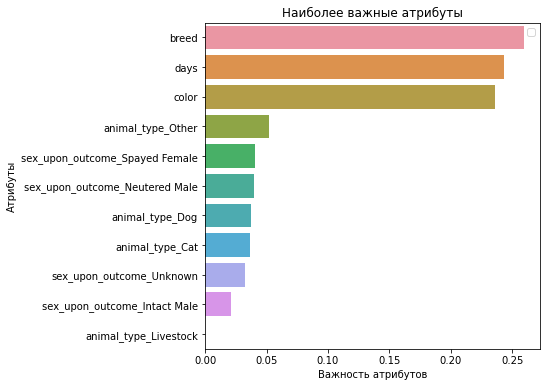

In [90]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import classification_report

In [92]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average

              precision    recall  f1-score   support

           0       0.27      0.03      0.06       124
           1       0.50      0.13      0.21        60
           2       0.73      0.50      0.59      1227
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         3
           5       0.44      0.29      0.35      2722
           6       0.00      0.00      0.00        30
           7       0.69      0.56      0.62      4743

   micro avg       0.62      0.46      0.53      8912
   macro avg       0.33      0.19      0.23      8912
weighted avg       0.61      0.46      0.52      8912
 samples avg       0.27      0.27      0.27      8912



0.6102088167053364

точность равна 60%. Плохо

In [93]:
from sklearn.decomposition import PCA

In [94]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_norm) # Вот тут нужно дропать таргет-значения?
projected_x = pd.DataFrame(data = principalComponents,
                           columns = ['atribute_1', 'atribute_2'])

In [95]:
projected_x.shape

(75425, 2)

In [96]:
output_y.shape

(75425, 8)

In [97]:
input_x = pd.merge(projected_x, output_y, left_index=True, right_index=True)
input_x.head()

,atribute_1,atribute_2,outcome_type_Died,outcome_type_Disposal,outcome_type_Euthanasia,outcome_type_Missing,outcome_type_Relocate,outcome_type_Return to Owner,outcome_type_Rto-Adopt,outcome_type_Transfer
0,1.111165,-0.062491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.306355,0.762125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.682361,-0.628463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.455677,-0.645557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.350927,0.013724,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
input_x.iloc[:, :2].head()

,atribute_1,atribute_2
0,1.111165,-0.062491
1,-0.306355,0.762125
2,-0.682361,-0.628463
3,-0.455677,-0.645557
4,0.350927,0.013724


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_x.drop(input_x.iloc[:, :2], axis=1), output_y, test_size=0.2)

In [100]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

model.score(X_test, y_test)

c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evgeny\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00      1251
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00      2701
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00      4711

   micro avg       1.00      1.00      1.00      8913
   macro avg       1.00      1.00      1.00      8913
weighted avg       1.00      1.00      1.00      8913
 samples avg       0.59      0.59      0.59      8913



1.0